In [1]:
import pyximport; pyximport.install()
from csvparser import *

In [54]:
csv_filename = "Distance Results/cluster-mapping-" + machine_alias + ".csv.txt"

fields = [['Heuristic'], ['Complexity'], ['Fitness']]
conditions = []

csv_data = extractDictFromCSV(csv_filename)
parsed_data = extractIndividualsFromData(csv_data, ind_field=fields[0], complexity_field= fields[1], fitness_field=fields[2], condition=conditions)
parsed_data = sorted(parsed_data, reverse=True)

In [55]:
plot_data = []

for ind in parsed_data:
    plot_data.append([ind.fitness, ind.complexity])

In [77]:
d = [
"IfThenElse(lowestCardLE(ARG0, 11), 'check', 'raise')",
"IfThenElse(and_(hasDoubles(ARG0), lowestCardGE(ARG0, 6)), 'raise', 'check')",
"IfThenElse(highestCardLE(ARG0, 10), 'check', IfThenElse(totalPotLE(ARG1, 2), 'raise', 'check'))",
"IfThenElse(and_(lowestCardLE(ARG0, 7), highestCardLE(ARG0, 11)), 'check', IfThenElse(totalPotLE(ARG1, 2), 'raise', 'check'))",
"IfThenElse(and_(lowestCardLE(ARG0, 7), highestCardLE(ARG0, 11)), 'check', IfThenElse(and_(totalPotGE(ARG1, 3), notHasDoubles(ARG0)), 'check', 'raise'))",
"IfThenElse(and_(lowestCardLE(ARG0, 7), highestCardLE(ARG0, 11)), 'check', IfThenElse(totalPotLE(ARG1, 2), 'raise', IfThenElse(hasDoubles(ARG0), 'raise', 'check')))",
"IfThenElse(and_(lowestCardLE(ARG0, 7), highestCardLE(ARG0, 11)), 'check', IfThenElse(and_(totalPotGE(ARG1, 3), notHasDoubles(ARG0)), 'check', IfThenElse(totalPotGE(ARG1, 25), 'check', 'raise')))",
"IfThenElse(and_(lowestCardLE(ARG0, 7), highestCardLE(ARG0, 11)), 'check', IfThenElse(totalPotLE(ARG1, 2), 'raise', IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(totalPotGE(ARG1, 6), 'fold', 'check'))))",
"IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(lowestCardGE(ARG0, 13), 'raise', IfThenElse(highestCardLE(ARG0, 11), 'check', IfThenElse(totalPotGE(ARG1, 6), 'raise', IfThenElse(totalPotLE(ARG1, 2), 'raise', 'check')))))",
"IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(highestCardLE(ARG0, 11), 'check', IfThenElse(and_(totalPotGE(ARG1, 6), and_(totalPotGE(ARG1, 29), cardDifferenceLE(ARG0, 9))), 'check', IfThenElse(totalPotGE(ARG1, 9), 'fold', IfThenElse(totalPotGE(ARG1, 3), 'check', 'raise')))))",
"IfThenElse(and_(totalPotLE(ARG1, 7), totalPotGE(ARG1, 3)), 'check', IfThenElse(highestCardGE(ARG0, 12), 'raise', IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(lowestCardGE(ARG0, 10), 'raise', IfThenElse(isSameSuit(ARG0), 'check', IfThenElse(totalPotGE(ARG1, 17), 'raise', 'check'))))))",
"IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(highestCardLE(ARG0, 11), 'check', IfThenElse(totalPotLE(ARG1, 2), 'raise', IfThenElse(lowestCardLE(ARG0, 6), 'check', IfThenElse(totalPotLE(ARG1, 9), 'check', IfThenElse(highestCardLE(ARG0, 12), 'raise', IfThenElse(cardDifferenceGE(ARG0, 4), 'fold', 'raise')))))))",
"IfThenElse(and_(totalPotLE(ARG1, 11), totalPotGE(ARG1, 3)), 'check', IfThenElse(highestCardGE(ARG0, 12), 'raise', IfThenElse(hasDoubles(ARG0), 'raise', IfThenElse(lowestCardGE(ARG0, 10), 'raise', IfThenElse(totalPotLE(ARG1, 11), 'check', IfThenElse(isSameSuit(ARG0), 'fold', IfThenElse(totalPotGE(ARG1, 17), 'raise', 'check')))))))",
]

other_line = []

for p in parsed_data:
    if p.heuristic in d:
        other_line.append([p.complexity, p.fitness])

other_line = sorted(other_line, key=lambda d: d[0])
print other_line

[[3, -0.561621875], [4, -0.634103125], [5, -0.13926875], [6, 0.09275], [7, 0.47311875], [8, 0.53315625], [9, 0.335984375], [10, 0.54410625], [11, 0.201734375], [13, 0.095340625], [14, 0.12754375], [15, 0.121459375], [16, 0.1140625]]


In [86]:
import matplotlib.pyplot as plt

%matplotlib inline

def scatterplot(x, y, data, ol):
    fig, ax = plt.subplots()
    fig.set_size_inches(30.0, 30.0)

    ax = plt.subplot(326)
    #x = [scatterplot_data['dice'][i][0] for i in range(0, 50)]
    #y = [scatterplot_data['dice'][i][1] for i in range(0, 50)]
    #markers = [(5,2), ">", (5, 0), (5, 1), '+']
    #colors = [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (0,1,1)]
    
    for i in range(0, len(x)):
        plt.scatter(x[i], y[i], s=80, c=(0,0,0), marker='o')

    l1 = createLineInScatter(createPointsLineOnScatter(data))
    l2 = createLineInScatter(ol, color='b')

    ax.set_xlabel('Complexity (# of clauses + # of actions)', fontsize=20)
    ax.set_ylabel('Fitness', fontsize=20)
    
    ax.legend([l1, l2], labels=["Most Fit on test set", "Most Fit on training set"])
    
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)
    
    plt.show()

def createPointsLineOnScatter(data):
    data_dict = {}
    for d in data:
        if d[1] not in data_dict:
            data_dict[d[1]] = [d[0]]
        else:
            data_dict[d[1]].append(d[0])

    points = []
    for key in data_dict:
        points.append((key, max(data_dict[key])))

    return points

def createLineInScatter(points, color='r'):
    x = [p[0] for p in points]
    y = [p[1] for p in points]
    
    return plt.plot(x, y, c=color)

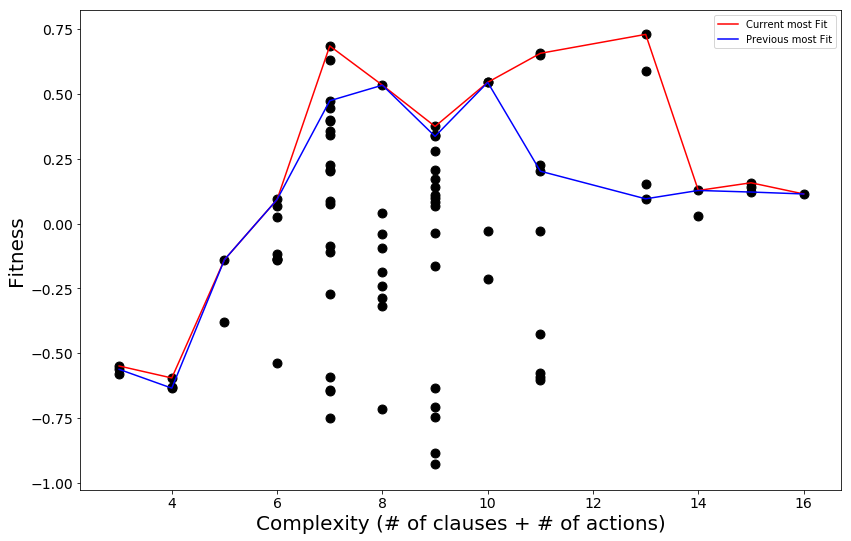

In [87]:
temp = [d for d in plot_data if d[0] > -1.0]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

scatterplot(x, y, plot_data, other_line)

In [57]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [58]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [59]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [60]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [61]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [62]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [63]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)

In [64]:
temp = [d for d in plot_data if d[0]]
#temp = plot_data

x = [d[1] for d in temp]
y = [d[0] for d in temp]

#scatterplot(x, y, plot_data)